<a href="https://colab.research.google.com/github/Eduardo775/C-digo-CM/blob/main/HOP_X%5E2_Feacture_Selection_Cleveland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización de Hiperparámetros en Modelsos de Aprendizaje automático

### **Código muestra para problemas de Clasificación**  
**Conjunto de datos usado:**  
&nbsp; Cleveland de la Universidad de California Irvine (UCI)

**Algoritmos de Aprendizaje Automático utilizados:**  
&nbsp; Random forest (RF)

**Algoritmos de Optimización de Hiperparámetros utilizados:**  
&nbsp; Grid search, random search, hyperband, Bayesian Optimization with Gaussian Processes (BO-GP), Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE)

**Métrica de Rendimiento:**  
&nbsp; Classification accuracy

## Contexto

Desarrollo del trabajo de tesis: Optimización de Hiperparámetros en Modelos de  Aprendizaje Automático para la Detección de Enfermedades Cardiovasculares (ECV). La principal aportación científica de esta investigación es el análisis y la  aplicación de las técnicas de optimización que determinan la mejor combinación  de valores de los hiperparámetros en ciertos algoritmos y diferentes conjuntos  de datos de ECV.

El proyecto de investigación sobre optimización de modelos de aprendizaje automático para la detección de ECV se estructura, específicamente, sobre la  base de conjuntos de datos que presentan esencialmente datos de diagnóstico de  varios pacientes a los que se les diagnosticó previamente una posible ECV. Los  conjuntos de datos que se están contemplando en el desarrollo de la tesis  provienen del repositorio de aprendizaje automático de la Universidad de  California, Invirne (UCI, 2022). Estos datan del 1988: Cleveland, Hungría,  Suiza y Long Beach V.

## Bibliotecas utilizadas

In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats
from sklearn.model_selection import KFold

## Indormación del conjunto de datos Cleveland
El conjunto de datos contiene 76 características, incluido el atributo de predicción, pero todos los experimentos publicados hacen referencia  a la utilización de un subconjunto de 14 de ellos 

1.- EDAD: edad en años

2.- SEXO: sexo (1= masculino; 0= femenino)

3.- CP: tipo de dolor de pecho

        -- Valor 1: angina típica
        -- Valor 2: angina atípica
        -- Valor 3: dolor no anginoso
        -- Valor 4: asintomático

4.-TRESBPS: presión arterial en reposo (en mm Hg al ingreso al hospital)

5.-CHOL: colestoral sérico en mg/dl

6.-FBS: (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)

7.-RESTECG:resultados electrocardiográficos en reposo

        -- Valor 0: normal
        -- Valor 1: tener anormalidad de onda ST-T (inversiones de onda T y/o ST
                    elevación o depresión de > 0,05 mV)
        -- Valor 2: mostrando hipertrofia ventricular izquierda probable o definitiva según el criterio de Estes

8.-THALACH:frecuencia cardíaca máxima alcanzada

9.-EXANG:angina inducida por ejercicio (1 = sí; 0 = no)

10.-OLDPEAK:depresión del ST inducida por el ejercicio en relación con el reposo

11.-SLOPE: la pendiente del segmento ST de ejercicio máximo

        -- Valor 1: ascendente
        -- Valor 2: plano
        -- Valor 3: descendente

12.-CA:número de vasos principales (0-3) coloreados por fluoroscopia

13.-THAL (thalassemia): 3 = normal; 6 = defecto fijo; 7 = defecto reversible; (trastorno sanguíneo hereditario que hace que tu cuerpo tenga menos hemoglobina de lo normal)

14.-CLASE:diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfico)

        -- Valor 0: < 50% estrechamiento del diámetro
        -- Valor 1: > 50% estrechamiento del diámetro

## Cargar el Conjunto de Datos

In [2]:
#read_csv ya que el formato de archivo de los datos descargados es csv
df = pd.read_csv('/content/sample_data/cleveland.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,clase
0,29,1,2,130,204,0,2,202,0,0.0,1,0,3,0
1,34,1,1,118,182,0,2,174,0,0.0,1,0,3,0
2,34,0,2,118,210,0,0,192,0,0.7,1,0,3,0
3,35,0,4,138,183,0,0,182,0,1.4,1,0,3,0
4,35,1,2,122,192,0,0,174,0,0.0,1,0,3,0


## Análisis de los datos

In [ ]:
# Información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  clase     303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# valores estadísticos básicos de nuestro conjunto de datos
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,clase
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.676568,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931963,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
# Ver la cantidad de valores nulos en cada una de las características
print('Valores nulos\n')
df.isnull().sum()

Valores nulos



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
clase       0
dtype: int64

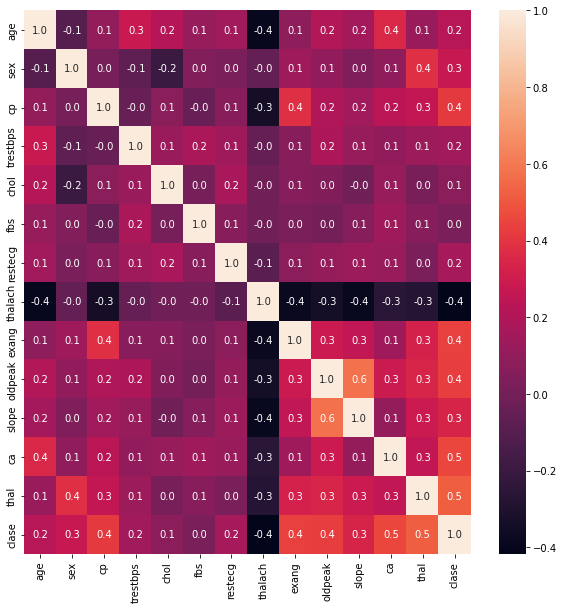

In [ ]:
# Matriz de correlación
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

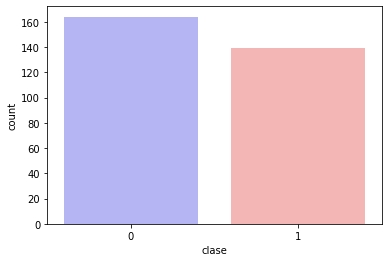

In [ ]:
# Distribución class (0= no tiene ECV; 1= si tiene ECV)
sns.countplot(x="clase", data=df, palette="bwr")
plt.show()

In [ ]:
# Número de instancias que corresponden a mujeres/hombres
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
all_ = len(df.sex)
print("Porcentaje de registros Femeninos: {:.2f}%".format((countFemale / all_*100)))
print("Percentaje de registros Masculino: {:.2f}%".format((countMale / all_*100)))

Porcentaje de registros Femeninos: 32.01%
Percentaje de registros Masculino: 67.99%


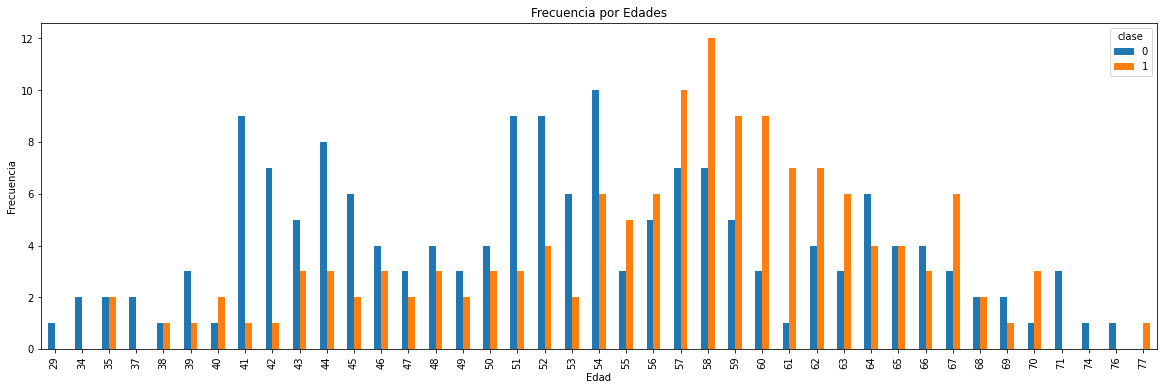

In [ ]:
# Distribución por edades
pd.crosstab(df.age,df.clase).plot(kind="bar",figsize=(20,6))
plt.title('Frecuencia por Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

age          54.438944
trestbps    131.689769
chol        246.693069
thalach     149.607261
oldpeak       1.039604
dtype: float64

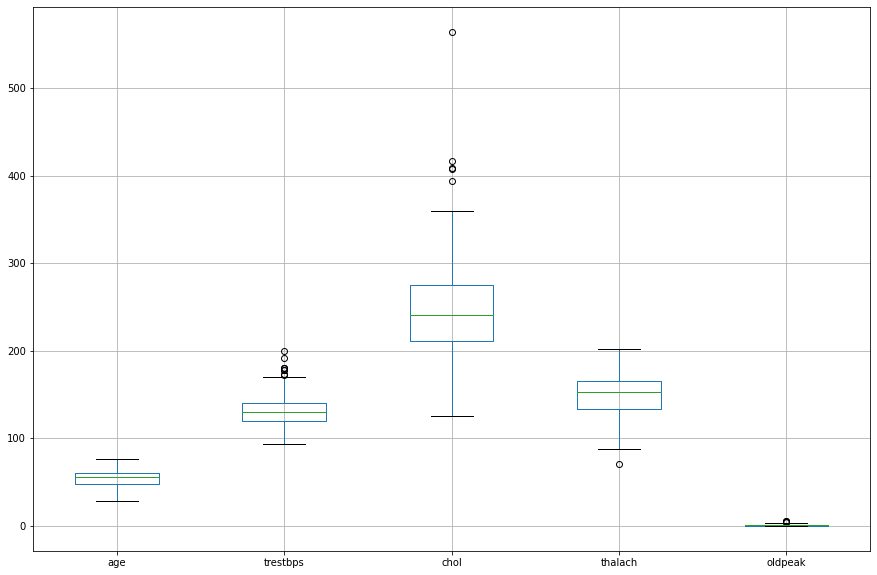

In [ ]:
#Visualizar los datos atípicos (sin escalamiento)
plt.figure(figsize=(15,10))
#Columnas numéricas
numeric_col = ['age','trestbps','chol','thalach','oldpeak']
df.boxplot(numeric_col)
df[numeric_col].mean()

## Selección de atributos. Por WEKA

In [3]:
#Función para asignar las características relevantes según la técnica que las determina
def AsignaCaracteristicas(lista_caracteristicas):
  X = df[lista_caracteristicas]
  return X

In [4]:
#One-Hot (OH) Encoding: crea una columna binaria para cada categoría de la columna a codificar
def OneHot_Encoding(dfCaracteristicas,categorical_variables):
  data_OneHot = pd.get_dummies(dfCaracteristicas,columns=categorical_variables)
  #data_OneHot.head()
  return data_OneHot

In [5]:
#ESTABLECIENDO LAS CARACTERISTICAS SEGÚN LAS TÉCNICAS FEACTURE SELECTION
    
# chi-square: determina la correlación entre las características y la clase predicha.
chi_square= [ 'thalach', 'oldpeak', 'ca', 'cp', 'exang', 'chol']
# crear un nuevo DataFrame con las caracteristicas seleccionadas
chi2=AsignaCaracteristicas(chi_square) # crear un nuevo DataFrame con las caracteristicas seleccionadas
chi2=OneHot_Encoding(chi2,['ca','cp','exang'])


In [6]:
chi2

,thalach,oldpeak,chol,ca_0,ca_1,ca_2,ca_3,cp_1,cp_2,cp_3,cp_4,exang_0,exang_1
0,202,0.0,204,1,0,0,0,0,1,0,0,1,0
1,174,0.0,182,1,0,0,0,1,0,0,0,1,0
2,192,0.7,210,1,0,0,0,0,1,0,0,1,0
3,182,1.4,183,1,0,0,0,0,0,0,1,1,0
4,174,0.0,192,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,130,0.0,265,0,1,0,0,0,0,1,0,1,0
299,125,1.6,149,1,0,0,0,0,0,0,1,1,0
300,121,0.2,269,0,1,0,0,0,1,0,0,0,1
301,116,1.1,197,1,0,0,0,0,0,1,0,1,0


## Escalamiento de datos

In [7]:
from sklearn.preprocessing import RobustScaler

#Función para escalar las características relevantes según la técnica que las determina
def EscalarDF(dfcopy):
  transformer = RobustScaler().fit_transform(dfcopy)
  dfEscalado=pd.DataFrame(transformer)
  dfEscalado.columns=dfcopy.columns
  return dfEscalado

chi_square= EscalarDF(chi2)


In [8]:
chi_square

,thalach,oldpeak,chol,ca_0,ca_1,ca_2,ca_3,cp_1,cp_2,cp_3,cp_4,exang_0,exang_1
0,1.507692,-0.5000,-0.578125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.646154,-0.5000,-0.921875,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.200000,-0.0625,-0.484375,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.892308,0.3750,-0.906250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.646154,-0.5000,-0.765625,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.707692,-0.5000,0.375000,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
299,-0.861538,0.5000,-1.437500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300,-0.984615,-0.3750,0.437500,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0
301,-1.138462,0.1875,-0.687500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# exportar el dataset estandarizado
chi_square.to_csv('Cleveland_Robust_Scaler_Pearson.csv')

## Separar el conjunto de entrenamiento y el de prueba

In [9]:
# Variable objetivo
y = df['clase'] 
#X = chi_square.drop(['clase'], axis = 1) #atributos

# Para modelar con selección de variables con chi-square
X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(chi_square, y, test_size=0.3, random_state=42)


## Modelos de aprendizaje automático de referencia

In [10]:
# Función que imprimirá todos los detalles importantes de cada entrenamiento
def print_score(clf, X_test, y_test):
  pred = clf.predict(X_test)
  clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
  print("Resultado de prueba con datos desconocidos:\n================================================")        
  print(f"Puntaje Accuracy: {accuracy_score(y_test, pred) * 100:.2f}%")
  print("_______________________________________________")
  print(f"REPORTE DE CLASIFICACIÓN:\n{clf_report}")
  print("_______________________________________________")
  print(f"Matrix de Confusión: \n {confusion_matrix(y_test, pred)}\n")
  cm=confusion_matrix(y_test,pred)
  print("/////////////////////////////////////////////////")  
  return pred  

In [11]:
#FUNCIÓN PARA CREAR UN MODELO CON BASE EN EL ALGORITMO RANDOM FOREST
from sklearn.model_selection import cross_validate
from sklearn.model_selection import  StratifiedKFold, ShuffleSplit
from sklearn import metrics

#Bibliotecas para graficar la curva roc
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


Usando Stratified Cross-Validation

In [12]:
#FUNCIÓN PARA CREAR LOS MODELOS DE REFERENCIA

kfold = KFold(n_splits=10)
skfold = StratifiedKFold(n_splits=10, shuffle=True)

def ModeloReferencia(ClfRef,X_trainA, y_trainA, X_testA, y_testA, lab):
  
  scores = cross_val_score(ClfRef,X_trainA, y_trainA, cv=skfold,scoring='accuracy', n_jobs=-1)

  print("Accuracy del i-Fold: "+ str(scores))
  print("Accuracy promedio entrenamiento: "+ str(scores.mean()))
  ClfRef.fit(X_trainA, y_trainA)

  #Imprimir sus métricas de desempeño
  resC=print_score(ClfRef, X_testA, y_testA)

  # Dibuja Matriz de confusión
  cm = confusion_matrix(y_testA, resC)
  cm_display = ConfusionMatrixDisplay(cm).plot()

  #Curvas ROC-AUC DEL RABDOM FOREST
  fig, ax = plt.subplots()
  RocCurveDisplay.from_estimator( ClfRef, X_testA, y_testA, ax = ax)
  # Graficar curva ROC
  metrics.RocCurveDisplay.from_predictions(y_testA,resC,ax=ax,name=lab)




## Modelos de referencia usando chi-square

Accuracy del i-Fold: [0.68181818 0.68181818 0.61904762 0.80952381 0.95238095 0.76190476
 0.85714286 0.80952381 0.76190476 0.71428571]
Accuracy promedio entrenamiento: 0.7649350649350649
Resultado de prueba con datos desconocidos:
Puntaje Accuracy: 83.52%
_______________________________________________
REPORTE DE CLASIFICACIÓN:
                   0          1  accuracy  macro avg  weighted avg
precision   0.851064   0.818182  0.835165   0.834623      0.835526
recall      0.833333   0.837209  0.835165   0.835271      0.835165
f1-score    0.842105   0.827586  0.835165   0.834846      0.835245
support    48.000000  43.000000  0.835165  91.000000     91.000000
_______________________________________________
Matrix de Confusión: 
 [[40  8]
 [ 7 36]]

/////////////////////////////////////////////////
--------------------------------------------------------------------------------------------------


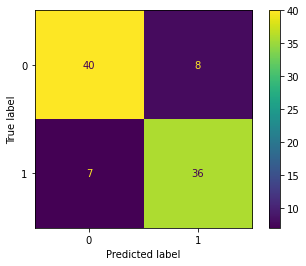

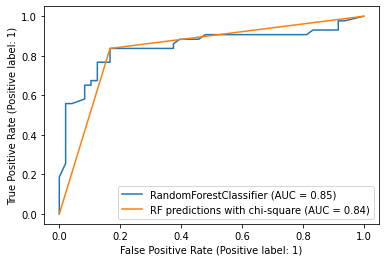

In [33]:
# Crear el modelo de referencia RF
clf_RF = RandomForestClassifier()
# Usando chi Feacture Selection 
ModeloReferencia(clf_RF,X_train_chi, y_train_chi, X_test_chi, y_test_chi,"RF predictions with chi-square") # Random Forest
print("--------------------------------------------------------------------------------------------------")


In [34]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(clf_RF.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Accuracy del i-Fold: [0.81818182 0.81818182 1.         0.9047619  0.76190476 0.80952381
 0.76190476 0.71428571 0.95238095 0.71428571]
Accuracy promedio entrenamiento: 0.8255411255411256
Resultado de prueba con datos desconocidos:
Puntaje Accuracy: 81.32%
_______________________________________________
REPORTE DE CLASIFICACIÓN:
                   0          1  accuracy  macro avg  weighted avg
precision   0.829787   0.795455  0.813187   0.812621      0.813564
recall      0.812500   0.813953  0.813187   0.813227      0.813187
f1-score    0.821053   0.804598  0.813187   0.812825      0.813277
support    48.000000  43.000000  0.813187  91.000000     91.000000
_______________________________________________
Matrix de Confusión: 
 [[39  9]
 [ 8 35]]

/////////////////////////////////////////////////
--------------------------------------------------------------------------------------------------


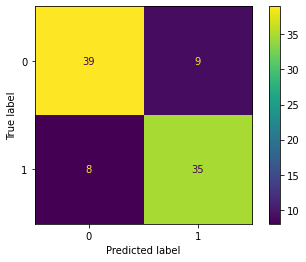

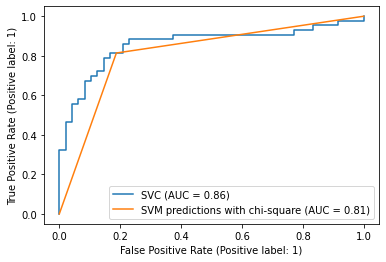

In [40]:
# Crear el modelo de referencia SVM
clf_SVM = SVC()

# Usando Pearson Feacture Selection 
ModeloReferencia(clf_SVM,X_train_chi, y_train_chi, X_test_chi, y_test_chi,"SVM predictions with chi-square") # SVM
print("--------------------------------------------------------------------------------------------------")

In [ ]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(clf_SVM.get_params())

Parameters currently in use:

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Accuracy del i-Fold: [0.63636364 0.68181818 0.80952381 0.61904762 0.76190476 0.71428571
 0.71428571 0.85714286 0.80952381 0.76190476]
Accuracy promedio entrenamiento: 0.7365800865800866
Resultado de prueba con datos desconocidos:
Puntaje Accuracy: 81.32%
_______________________________________________
REPORTE DE CLASIFICACIÓN:
                   0          1  accuracy  macro avg  weighted avg
precision   0.844444   0.782609  0.813187   0.813527      0.815225
recall      0.791667   0.837209  0.813187   0.814438      0.813187
f1-score    0.817204   0.808989  0.813187   0.813097      0.813322
support    48.000000  43.000000  0.813187  91.000000     91.000000
_______________________________________________
Matrix de Confusión: 
 [[38 10]
 [ 7 36]]

/////////////////////////////////////////////////
--------------------------------------------------------------------------------------------------


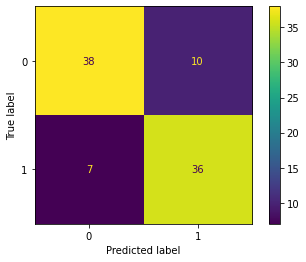

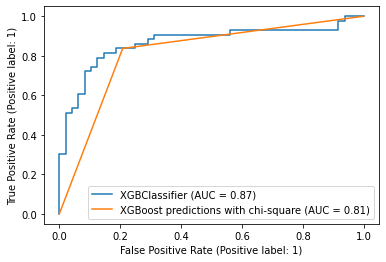

In [46]:
# Crear el modelo de referencia XGBoost
#!pip install xgboost
import xgboost as xgb

clf_XGB = xgb.XGBClassifier()

# Usando Pearson Feacture Selection 
ModeloReferencia(clf_XGB,X_train_chi, y_train_chi, X_test_chi, y_test_chi,"XGBoost predictions with chi-square") # XGBoost
print("--------------------------------------------------------------------------------------------------")

In [ ]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(clf_XGB.get_params())

Parameters currently in use:

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


## Algoritmo CON Grid Search
Buscar todas las configuraciones de hiperparámetros dadas

**Ventajas:**
* Aplicación sencilla.  

**Desventajas:**  
* El tiempo que consume,
* Sólo es eficiente con los HPs categóricos.

In [ ]:
#Función para crear modelos con Grid Search con cualquier algoritmo y técnica de selección d3e caracteristicas
from sklearn.model_selection import GridSearchCV

def Crea_Modelo_GridSearch(clf,rf_params,skfold,X_trainA, y_trainA,X_testA, y_testA,lab):
  grid = GridSearchCV(clf, rf_params, cv=skfold, scoring='accuracy',return_train_score=True, n_jobs=-1)
  grid.fit(X_trainA, y_trainA)
  print(grid.cv_results_)
  print(grid.best_params_)
  print("Accuracy:"+ str(grid.best_score_))

  #Mostramos los valores de las métricas de desempeño
  pred=print_score(grid, X_testA, y_testA)

  #Matriz de confusiuón
  cm = confusion_matrix(y_testA, pred)
  cm_display = ConfusionMatrixDisplay(cm).plot()

  #Curvas ROC-AUC de SVM
  fig, ax = plt.subplots()
  RocCurveDisplay.from_estimator( grid, X_testA, y_testA, ax = ax)
  # Graficar curva ROC
  metrics.RocCurveDisplay.from_predictions(y_testA,pred,ax=ax,name=lab)
  return pred


{'mean_fit_time': array([0.03186007, 0.03737738, 0.05115006, ..., 0.1446574 , 0.15262043,
       0.17039471]), 'std_fit_time': array([0.00618134, 0.00264906, 0.00805117, ..., 0.00925759, 0.00549261,
       0.0167176 ]), 'mean_score_time': array([0.00558846, 0.0072866 , 0.00678623, ..., 0.01854711, 0.01714962,
       0.01833644]), 'std_score_time': array([0.00056053, 0.00524284, 0.00078326, ..., 0.00551699, 0.0010457 ,
       0.00184495]), 'param_bootstrap': masked_array(data=[True, True, True, ..., False, False, False],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[None, None, None, ..., 9, 9, 9],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['auto', 'auto', 'auto', ..., 0.9, 0.9, 0.9],
             mask=[False, False, False, ..., False, False, False],
       fill_valu

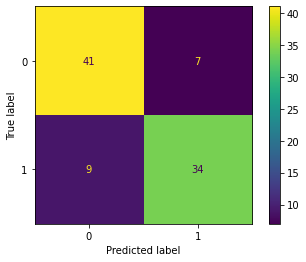

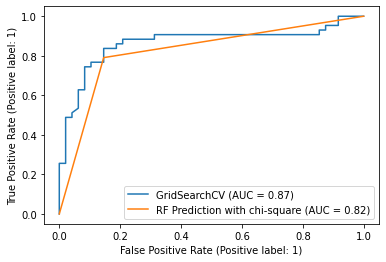

In [ ]:
#RANDOM FOREST CON chi-square
#Definimos los pliegues de la validación cruzada estratificada
skfold = StratifiedKFold(n_splits=10, shuffle=True)

# Espacio de configuración de los hiperparámetros
rf_params = {
    'n_estimators': [10,15,20,25,30,35,40,45,50,55,60,70,80,90,100],
    'max_features': ['auto','sqrt',0.4,0.5,0.9],
    'max_depth': [None,4, 5, 7, 9],
    'min_samples_leaf': [1,2,3,4,5,6],
    "bootstrap":[True,False],
}
clfRF_GS = RandomForestClassifier()

predRF_GS=Crea_Modelo_GridSearch(clfRF_GS,rf_params,skfold,X_train_chi, y_train_chi, X_test_chi, y_test_chi,"RF Prediction with chi-square")

{'mean_fit_time': array([0.00611842, 0.00481093, 0.0065268 , ..., 0.00505538, 0.00518827,
       0.00527141]), 'std_fit_time': array([0.00195322, 0.00084567, 0.00203409, ..., 0.00018615, 0.00080641,
       0.00035972]), 'mean_score_time': array([0.00236013, 0.00243504, 0.0026526 , ..., 0.00241506, 0.00254087,
       0.00232644]), 'std_score_time': array([0.00018106, 0.00040107, 0.00018113, ..., 0.00020385, 0.00027046,
       0.00011172]), 'param_C': masked_array(data=[1, 1, 1, ..., 100, 100, 100],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_degree': masked_array(data=[1, 1, 1, ..., 5, 5, 5],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=['scale', 'scale', 'scale', ..., 0.003, 0.003, 0.003],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object),

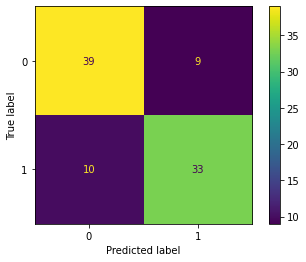

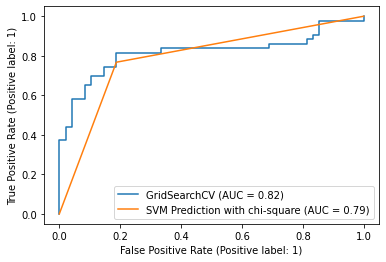

In [ ]:
#SVM
from sklearn.model_selection import GridSearchCV

#Definimos los pliegues de la validación cruzada estratificada
skfold = StratifiedKFold(n_splits=10, shuffle=True)

# Espacio de configuración de los hiperparámetros
rf_params = {
    'C': [1, 2,6,7,10, 20, 30, 40, 45, 50, 55, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001,0.09,0.0001,0.004,0.05,0.3,0.0004,0.003],
    "kernel":['linear','poly','rbf','sigmoid'],
    'degree': [1,2,3,4,5]
}
clfSVM_GS = SVC()

predSVM_GS=Crea_Modelo_GridSearch(clfSVM_GS,rf_params,skfold,X_train_chi, y_train_chi, X_test_chi, y_test_chi,"SVM Prediction with chi-square")


{'mean_fit_time': array([0.01394112, 0.01319041, 0.01342325, ..., 0.04420183, 0.04820685,
       0.04618852]), 'std_fit_time': array([0.00302329, 0.00282746, 0.00231196, ..., 0.00269198, 0.00557486,
       0.00188692]), 'mean_score_time': array([0.00157988, 0.00170832, 0.00142748, ..., 0.00170679, 0.00166662,
       0.00163221]), 'std_score_time': array([4.89665852e-05, 4.64963395e-04, 5.91365602e-05, ...,
       9.38259234e-05, 4.35774185e-05, 1.52509192e-04]), 'param_gamma': masked_array(data=[0.5, 0.5, 0.5, ..., 5, 5, 5],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, ..., 0.1, 0.1, 0.1],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 3, 3, ..., 7, 7, 7],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
  

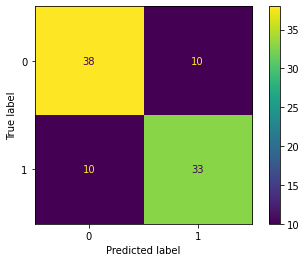

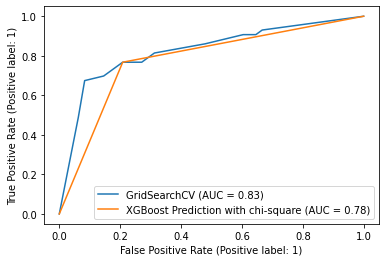

In [ ]:
#XGBoost
import xgboost as xgb

#Definimos los pliegues de la validación cruzada estratificada
skfold = StratifiedKFold(n_splits=10, shuffle=True)

# Espacio de configuración de los hiperparámetros
rf_params = {
    'n_estimators': [15, 25,27,30, 40, 45, 50,70,75,80],
    'learning_rate': [0.01, 0.02,0.1],
    'gamma': [0.5, 1, 1.5, 2, 3,4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5,7],
    'min_samples_leaf': [1,2,3, 4]
}
clfXGB_GS = xgb.XGBClassifier()

predSVM_GS=Crea_Modelo_GridSearch(clfXGB_GS,rf_params,skfold,X_train_chi, y_train_chi, X_test_chi, y_test_chi,"XGBoost Prediction with chi-square")

## Algoritmo CON Random Search
Buscar aleatoriamente combinaciones de hiperparámetros en el espacio de búsqueda

**Ventajas:**
* Más eficiente que la GS..
* Activar la paralelización.

**Desventajas:**  
* No tener en cuenta los resultados anteriores.
* No es eficiente con los HP condicionales.

In [47]:
#Función para crear modelos con Random Search con cualquier algoritmo y técnica de selección d3e caracteristicas
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV

def Crea_Modelo_RandomSearch(clf,rf_params,skfold,X_trainA, y_trainA,X_testA, y_testA,lab,n_iter_search):
  random = RandomizedSearchCV(clf, param_distributions= rf_params, cv=skfold, scoring='accuracy',return_train_score=True, n_jobs=-1,n_iter=n_iter_search )
  random.fit(X_trainA, y_trainA)
  print(random.cv_results_)
  print(random.best_params_)
  print("Accuracy:"+ str(random.best_score_))

  #Mostramos los valores de las métricas de desempeño
  pred=print_score(random, X_testA, y_testA)

  #Matriz de confusiuón
  cm = confusion_matrix(y_testA, pred)
  cm_display = ConfusionMatrixDisplay(cm).plot()

  #Curvas ROC-AUC de SVM
  fig, ax = plt.subplots()
  RocCurveDisplay.from_estimator( random, X_testA, y_testA, ax = ax)
  # Graficar curva ROC
  metrics.RocCurveDisplay.from_predictions(y_testA,pred,ax=ax,name=lab)
  return pred


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

{'mean_fit_time': array([0.02052538, 0.13620443, 0.04847898, 0.11265547, 0.18019063,
       0.01614003, 0.07410333, 0.03500798, 0.13946152, 0.09016905,
       0.06608045, 0.08875072, 0.07612221, 0.0967859 , 0.12647674,
       0.12533739, 0.03879442, 0.16765459, 0.0681483 , 0.12897444,
       0.06410897, 0.08586252, 0.06449718, 0.03429692, 0.10304937,
       0.04736977, 0.07463906, 0.12256291, 0.09012725, 0.06944876,
       0.03218281, 0.02448483, 0.09061899, 0.02426653, 0.05397723,
       0.01668854, 0.03551078, 0.05240929, 0.01503093, 0.01732173,
       0.12519741, 0.03599281, 0.0820714 , 0.1356209 , 0.1334367 ,
       0.09013946, 0.0739712 , 0.15578685, 0.04058242, 0.08803828,
       0.06865258, 0.10978119, 0.05508955, 0.12477694, 0.10400932,
       0.16401062, 0.0362417 , 0.05208337, 0.06500046, 0.1064312 ,
       0.02174547, 0.24074268, 0.27811427, 0.11114118, 0.05365341,
       0.08781044, 0.09812121, 0.05808876, 0.15203259, 0.07598372,
       0.1516557 , 0.03376772, 0.06564872, 0

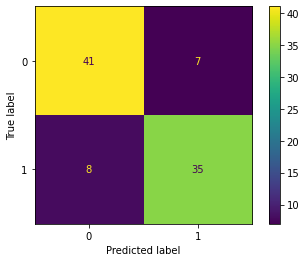

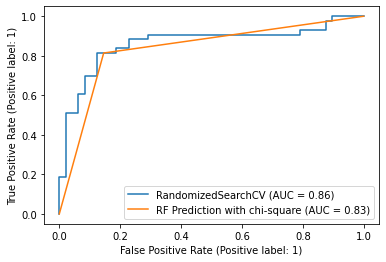

In [65]:
#RANDOM FOREST
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [20,22,24,26,28,30, 32,34,36,38,40, 45, 50, 52,54,56,58,60, 65, 70, 75, 80,90,100],
    'max_features': ['sqrt',0.1, 0.2, 0.3, 0.5, 0.7],
    'max_depth': [5, 7, 9, 10, 12],
    'min_samples_split': [1,2,3,4,5,6,7],
    'min_samples_leaf': [1,2,3, 4, 5,6,7],
    "bootstrap":[True,False],
    "criterion":['gini','entropy']
}
n_iter_search=100
clfRF_RS = RandomForestClassifier()

skfold = StratifiedKFold(n_splits=10, shuffle=True)
predRF_RS=Crea_Modelo_RandomSearch(clfRF_RS,rf_params,skfold,X_train_chi, y_train_chi, X_test_chi, y_test_chi,"RF Prediction with chi-square",n_iter_search)

{'mean_fit_time': array([0.00622082, 0.00581121, 0.00899565, 0.00584805, 0.00797954,
       0.00672617, 0.00710382, 0.00735452, 0.00645895, 0.00690286,
       0.00543511, 0.00464935, 0.00571296, 0.00659275, 0.005041  ,
       0.00690432, 0.00549994, 0.00554349, 0.00636327, 0.00635288,
       0.00600305, 0.02027712, 0.02390089, 0.00615194, 0.00675533,
       0.0083071 , 0.00670972, 0.0053699 , 0.00539997, 0.00791345,
       0.00629716, 0.00652537, 0.00706506, 0.00593698, 0.02348104,
       0.0052614 , 0.00547869, 0.0087291 , 0.00586283, 0.00557816,
       0.02248085, 0.00616195, 0.00513544, 0.02389388, 0.00595832,
       0.00526679, 0.00616045, 0.01216664, 0.00803626, 0.00694854]), 'std_fit_time': array([0.0019263 , 0.00111926, 0.00552274, 0.00043347, 0.00260068,
       0.00217132, 0.00188427, 0.00426842, 0.00234961, 0.00224806,
       0.0003553 , 0.00033588, 0.0005225 , 0.00356198, 0.00039871,
       0.00265478, 0.00020335, 0.00029235, 0.00190508, 0.00235519,
       0.00183649, 0.00469

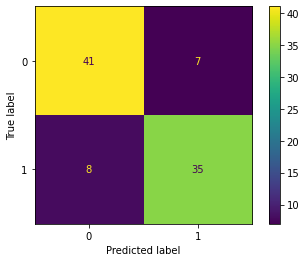

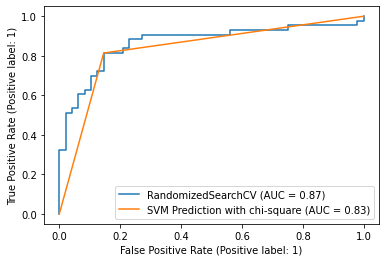

In [76]:
#SVM
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'C': [1, 2,6,7,10, 20, 30, 40, 45, 50, 55, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001,0.09,0.0001,0.004,0.05,0.3,0.0004,0.003],
    "kernel":['linear','poly','rbf','sigmoid'],
    'degree': [1,2,3,4,5]
}
clfSVM_RS = SVC()

n_iter_search=50 # El número de iteraciones está fijado 

skfold = StratifiedKFold(n_splits=10, shuffle=True)
predSVM_RS=Crea_Modelo_RandomSearch(clfSVM_RS,rf_params,skfold,X_train_chi, y_train_chi, X_test_chi, y_test_chi,"SVM Prediction with chi-square",n_iter_search)

{'mean_fit_time': array([0.02691073, 0.02278116, 0.04413581, 0.01627033, 0.02560635,
       0.02383649, 0.01777914, 0.02016184, 0.02134404, 0.03019946,
       0.02299926, 0.02892506, 0.02439723, 0.04283061, 0.02735822,
       0.01511507, 0.02306859, 0.02604694, 0.03002331, 0.02051375,
       0.01692953, 0.019871  , 0.024753  , 0.0243067 , 0.01425321,
       0.0253828 , 0.01714492, 0.02251656, 0.02135952, 0.02761195,
       0.05800068, 0.02423067, 0.02642875, 0.01646366, 0.01521566,
       0.02271612, 0.01891487, 0.02533662, 0.01365423, 0.03001773,
       0.0206315 , 0.0368973 , 0.02071633, 0.01885474, 0.03018553,
       0.0234807 , 0.03291738, 0.01040149, 0.01896019, 0.01195066,
       0.02199256, 0.02741971, 0.0165549 , 0.01397209, 0.02220869,
       0.01794846, 0.02014568, 0.01058333, 0.0220685 , 0.01367815,
       0.03261721, 0.00870054, 0.02441821, 0.02396891, 0.0315707 ,
       0.01160407, 0.01524382, 0.01175926, 0.01905239, 0.01094072,
       0.02014825, 0.05335662, 0.0175622 , 0

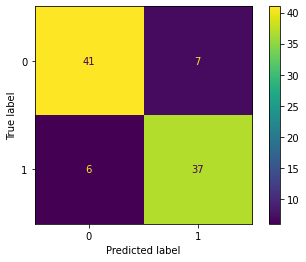

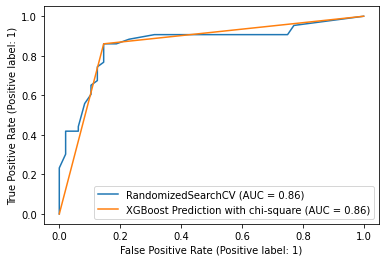

In [ ]:
#XGBoost

#Definimos los pliegues de la validación cruzada estratificada
skfold = StratifiedKFold(n_splits=10, shuffle=True)

# Espacio de configuración de los hiperparámetros
rf_params = {
    'n_estimators': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,100],
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.4, 0.5, 0.6, 0.7],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 3,4, 5,6,7,8,9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5,6,7,8],
    'max_features': [0.1, 0.2, 0.3, 0.5, 0.7,0.8,0.9,1]
}
clfXGB_RS = xgb.XGBClassifier()
n_iter_search=100
predSVM_GS=Crea_Modelo_RandomSearch(clfXGB_RS,rf_params,skfold,X_train_chi, y_train_chi, X_test_chi, y_test_chi,"XGBoost Prediction with chi-square",n_iter_search)

## HPO Algorithm 4: BO-GP
Bayesian Optimization with Gaussian Process (BO-GP)

**Advantages:**
* Fast convergence speed for continuous HPs.  

**Disadvantages:**  
* Poor capacity for parallelization.
* Not efficient with conditional HPs.

In [ ]:
!pip install scikit-BayesSearchCV

In [ ]:
#Instalar paquetes de optimización bayesiana}

!pip install skopt
!pip install scikit-optimize

In [78]:
#Función para crear modelos con Grid Search con cualquier algoritmo y técnica de selección d3e caracteristicas
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

def Crea_Modelo_BO(clf,rf_params,skfold,X_trainA, y_trainA,X_testA, y_testA,lab,n_iter):
  Bayes = BayesSearchCV(clf, rf_params,cv=skfold,n_iter=15, n_jobs=-1, return_train_score=True,scoring='accuracy')
  Bayes.fit(X_trainA, y_trainA)
  print(Bayes.cv_results_)
  print(Bayes.best_params_)
  print("Accuracy:"+ str(Bayes.best_score_))

  #Mostramos los valores de las métricas de desempeño
  pred=print_score(Bayes, X_testA, y_testA)

  #Matriz de confusiuón
  cm = confusion_matrix(y_testA, pred)
  cm_display = ConfusionMatrixDisplay(cm).plot()

  #Curvas ROC-AUC de SVM
  fig, ax = plt.subplots()
  RocCurveDisplay.from_estimator( Bayes, X_testA, y_testA, ax = ax)
  # Graficar curva ROC
  metrics.RocCurveDisplay.from_predictions(y_testA,pred,ax=ax,name=lab)
  return pred

### Using skopt.BayesSearchCV

{'mean_fit_time': array([0.13371668, 0.16029339, 0.15504177, 0.0767771 , 0.06623368,
       0.12855175, 0.08761275, 0.13411007, 0.14601309, 0.19588671,
       0.13677509, 0.19282019, 0.15439038, 0.10983076, 0.09968665]), 'std_fit_time': array([0.01232648, 0.0134036 , 0.00954554, 0.00777899, 0.00100519,
       0.01443   , 0.00254221, 0.00742134, 0.00742499, 0.02125966,
       0.01976968, 0.01705528, 0.02162775, 0.0169599 , 0.01239603]), 'mean_score_time': array([0.01443486, 0.01426022, 0.01565273, 0.00834026, 0.007796  ,
       0.01388373, 0.00890779, 0.0145246 , 0.01584964, 0.01604567,
       0.01308568, 0.02089789, 0.0126826 , 0.01442966, 0.00954983]), 'std_score_time': array([0.00590459, 0.00181017, 0.0031634 , 0.0004172 , 0.00039111,
       0.0009202 , 0.00015817, 0.00250494, 0.00243618, 0.00226749,
       0.00313821, 0.00904923, 0.00033463, 0.00318749, 0.00132469]), 'param_bootstrap': masked_array(data=[True, True, True, True, True, False, True, True, False,
                   True

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0])

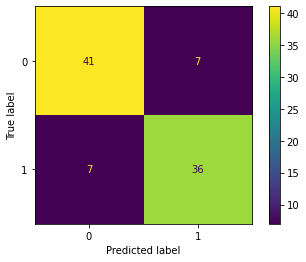

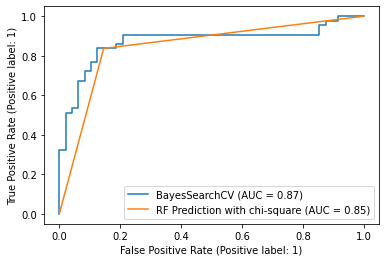

In [99]:
#RANDOM FOREST

# Define the hyperparameter configuration space
rf_paramsB = {
    'n_estimators': [20,22,24,26,28,30, 32,34,36,38,40, 45, 50, 52,54,56,58,60, 65, 70, 75, 80,90,100],
    'max_features': [0.1, 0.2, 0.3, 0.5, 0.7,0.8,0.9,1],
    'max_depth': [5, 7, 9, 10, 12],
    'min_samples_split': [2,3,4,5,6,7],
    'min_samples_leaf': [1,2,3, 4, 5,6,7],
    "bootstrap":[True,False],
    "criterion":['gini','entropy']
}
n_iter_search=30 # El número de iteraciones está fijado en 20, puede aumentar este número si el tiempo lo permite
clfBayes = RandomForestClassifier()
skfold = StratifiedKFold(n_splits=10, shuffle=True)

Crea_Modelo_BO(clfBayes,rf_paramsB,skfold,X_train_chi, y_train_chi, X_test_chi, y_test_chi,"RF Prediction with chi-square",n_iter_search)

{'mean_fit_time': array([0.0058759 , 0.00715489, 0.0143292 , 0.00858331, 0.00729418,
       0.0094564 , 0.00606887, 0.00732968, 0.00581934, 0.00827537,
       0.00704613, 0.01187036, 0.0093514 , 0.00767913, 0.00776629]), 'std_fit_time': array([0.00119749, 0.00179495, 0.00493267, 0.00467009, 0.00131205,
       0.00290335, 0.00060536, 0.00258734, 0.0003858 , 0.00392387,
       0.00415514, 0.00645175, 0.00395042, 0.00320178, 0.00317806]), 'mean_score_time': array([0.0029834 , 0.00288627, 0.00363603, 0.00311308, 0.00272384,
       0.00372036, 0.00281701, 0.0029525 , 0.002578  , 0.00622108,
       0.00695329, 0.00471978, 0.00558615, 0.00254767, 0.00336406]), 'std_score_time': array([0.00077247, 0.00018068, 0.00147309, 0.00105823, 0.00012828,
       0.00226237, 0.00051343, 0.00073471, 0.0001398 , 0.00376691,
       0.00391916, 0.00448265, 0.00390379, 0.00025038, 0.0022587 ]), 'param_C': masked_array(data=[2.0, 5.5, 20.0, 15.0, 5.5, 16.0, 2.5, 4.0, 2.5, 10.0,
                   2.5, 17.0, 2.5

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0])

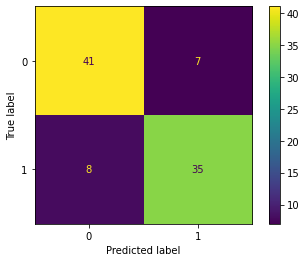

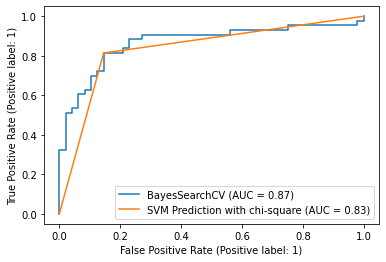

In [141]:
#SVM
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
# Define the hyperparameter configuration space
rf_paramsSVM = {
    'C': [1, 2,2.5, 3,4, 5,5.5,9.5,10,10.5,11,11.5,12,12.3,13,14,15,16,17,18,6,7,20, 30, 40, 45, 50, 55, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001,0.00001,0.00002],
    "kernel":['linear','poly','rbf','sigmoid'],
    'degree':[1,2,3,4,5,6]
}
n_iter_search=50 # El número de iteraciones está fijado en 20, puede aumentar este número si el tiempo lo permite
clfSVM = SVC()

skfold = StratifiedKFold(n_splits=10, shuffle=True)

Crea_Modelo_BO(clfSVM,rf_paramsSVM,skfold,X_train_chi, y_train_chi, X_test_chi, y_test_chi,"SVM Prediction with chi-square",n_iter_search)

{'mean_fit_time': array([0.02615798, 0.0187628 , 0.01768153, 0.01408894, 0.017823  ,
       0.01134992, 0.01494124, 0.02111232, 0.01936955, 0.03102212,
       0.0275696 , 0.03230517, 0.03117142, 0.02972558, 0.02488785]), 'std_fit_time': array([0.00505565, 0.00589374, 0.00668244, 0.0003289 , 0.00134998,
       0.00074118, 0.00036838, 0.00178293, 0.00795278, 0.0102162 ,
       0.00908095, 0.01174085, 0.0087263 , 0.00973819, 0.0096205 ]), 'mean_score_time': array([0.00209188, 0.00235145, 0.00189617, 0.00193195, 0.00277174,
       0.00221331, 0.00204935, 0.00218894, 0.00241489, 0.00168674,
       0.0020113 , 0.00255187, 0.00366542, 0.00199137, 0.00177627]), 'std_score_time': array([0.00014988, 0.00097512, 0.00013697, 0.00012364, 0.00171781,
       0.00061084, 0.00017921, 0.00034265, 0.00075108, 0.00016385,
       0.00024323, 0.00104785, 0.00352729, 0.00091839, 0.00020125]), 'param_colsample_bytree': masked_array(data=[0.8, 1.0, 0.8, 0.8, 0.8, 1.0, 0.8, 0.6, 0.8, 1.0, 1.0,
                 

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0])

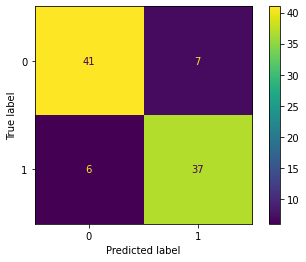

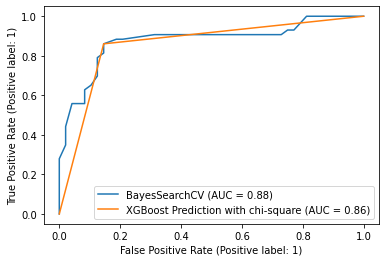

In [158]:
#XGBoost

#Definimos los pliegues de la validación cruzada estratificada
skfold = StratifiedKFold(n_splits=10, shuffle=True)

# Espacio de configuración de los hiperparámetros
rf_params = {
    'n_estimators': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,100],
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.4, 0.5, 0.6, 0.7],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 3,4, 5,6,7,8,9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5,6,7,8],
    'max_features': [0.1, 0.2, 0.3, 0.5, 0.7,0.8,0.9,1]
}
clfXGB_OB = xgb.XGBClassifier()
n_iter_search=50

Crea_Modelo_BO(clfXGB_OB,rf_params,skfold,X_train_chi, y_train_chi, X_test_chi, y_test_chi,"XGBoost Prediction with chi-square",n_iter_search)